In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics
import h5py
import pickle
import random
from random import randrange

In [3]:
highl = h5py.File('data_highLumi_pt_250_500.h5', 'r')
highl.keys()

<KeysViewHDF5 ['data']>

In [4]:
lowl = h5py.File('data_lowLumi_pt_250_500.h5', 'r')
lowl.keys()

<KeysViewHDF5 ['data']>

In [5]:
datah = np.array(highl.get('data'))
print(datah)

datal = np.array(lowl.get('data'))
print(datal)

['axis0' 'axis1' 'block0_items' 'block0_values']
['axis0' 'axis1' 'block0_items' 'block0_values']


#### 'block0_items' contains the feature names, 'block0_values' contains the data values

In [6]:
hdata = highl['data']
list(hdata)

a = np.array(hdata['block0_items'])
pd.DataFrame(a)

b = np.array(hdata['block0_values'])
pd.DataFrame(b)

pth = b[:,0]
etah = b[:,1]
phih = b[:,2]
massh = b[:,3]
ee2h = b[:,4]
ee3h  = b[:,5]
d2h = b[:,6]
angularityh = b[:,7]
t1h = b[:,8]
t2h = b[:,9]
t3h = b[:,10]
t21h = b[:,11]
t32h = b[:,12]
KtDeltaRh = b[:,13]

In [7]:
ldata = lowl['data']
list(hdata)

c = np.array(ldata['block0_items'])
pd.DataFrame(c)

d = np.array(ldata['block0_values'])
pd.DataFrame(d)

ptl = d[:,0]
etal = d[:,1]
phil = d[:,2]
massl = d[:,3]
ee2l = d[:,4]
ee3l  = d[:,5]
d2l = d[:,6]
angularityl = d[:,7]
t1l = d[:,8]
t2l = d[:,9]
t3l = d[:,10]
t21l = d[:,11]
t32l = d[:,12]
KtDeltaRl = d[:,13]

In [8]:
higgs_data = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(higgs_data)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [9]:
qcd_data = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(qcd_data)

qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

# Lab 8. Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using the pseduo-experiment datasets.

### 1 High luminosity data

    For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.
    Evaluate observed significance and compare your results to expectation.


In [10]:
print(np.size(massh))
print(np.size(massl))
print(np.size(higgs['mass']))
#ratio should be 100 higgs to 20000 qcd. ~0.005

s1 = 20000/100000
s2 = 100/100000
s3 = 20100/ (np.size(massl))
s4 = 20100/ (np.size(massh))
i = np.zeros(100000)
ii = np.zeros(100000)
iii = np.zeros(np.size(massl))
iiii = np.zeros(np.size(massh))
i[:] = s1
ii[:] = s2
iii[:] = s3
iiii[:] = s4

low_color = 'orange'
high_color = 'orange'
higgs_color = 'blue'

alpha_l = 1
alpha_h = 1
alpha_qcd = 1
alpha_higgs = 0.7




40344
4060
100000


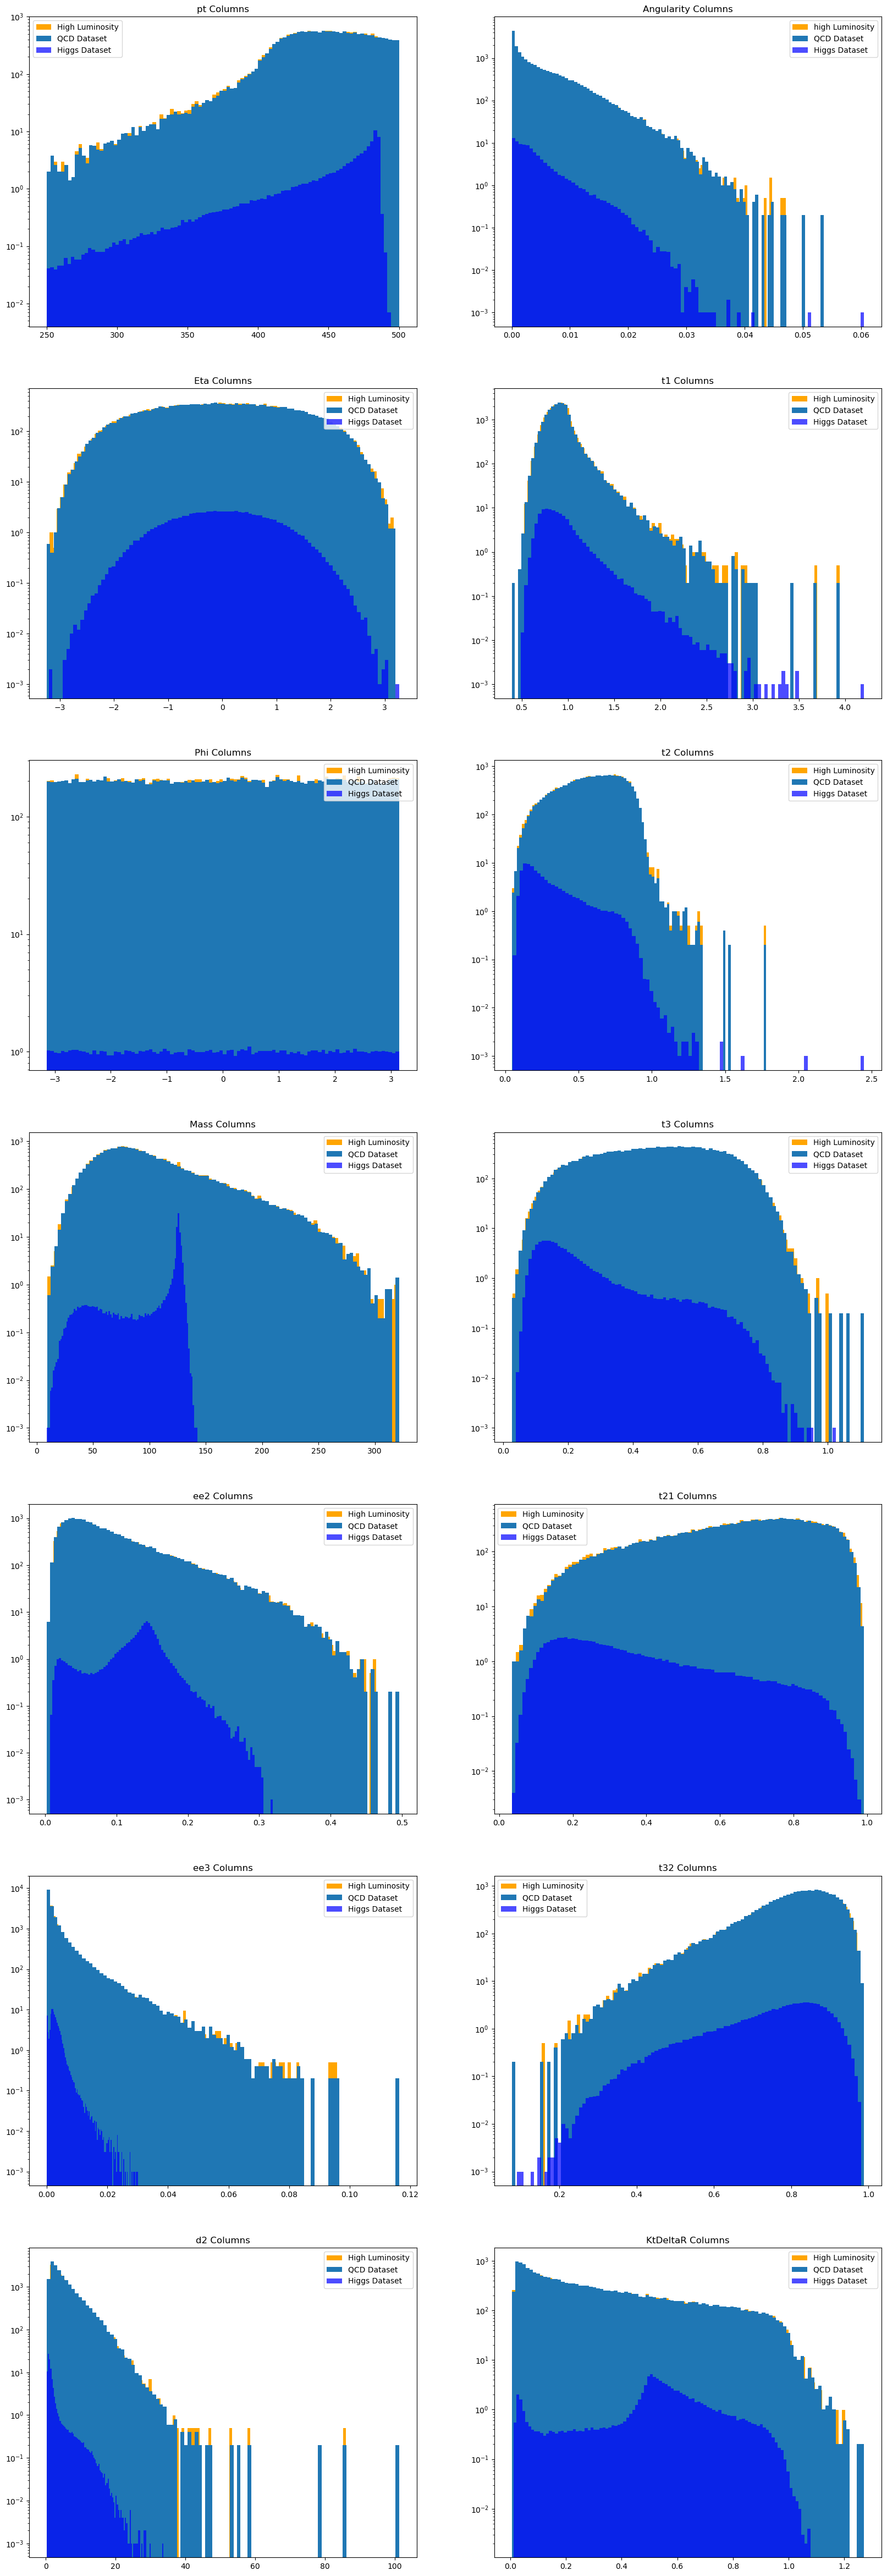

In [11]:


fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

ax[0,0].hist(pth, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[0,0].hist(qcd['pt'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(higgs['pt'], 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns')

ax[1,0].hist(etah, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[1,0].hist(qcd['eta'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(higgs['eta'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns')

ax[2,0].hist(phih, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,0].hist(qcd['phi'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(higgs['phi'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns')

ax[3,0].hist(massh, 100, weights = iiii,color =high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[3,0].hist(qcd['mass'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(higgs['mass'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns')

ax[4,0].hist(ee2h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,0].hist(qcd['ee2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(higgs['ee2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist(ee3h, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[5,0].hist(qcd['ee3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(higgs['ee3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist(d2h, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density =False)
ax[6,0].hist(qcd['d2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(higgs['d2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns')

ax[0,1].hist(angularityh, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'high Luminosity', density = False)
ax[0,1].hist(qcd['angularity'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(higgs['angularity'], 100, weights = ii, color = higgs_color, alpha =alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns')

ax[1,1].hist(t1h, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[1,1].hist(qcd['t1'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(higgs['t1'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns')

ax[2,1].hist(t2h, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,1].hist(qcd['t2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(higgs['t2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns')

ax[3,1].hist(t3h, 100, weights = iiii,color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[3,1].hist(qcd['t3'], 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(higgs['t3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns')

ax[4,1].hist(t21h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,1].hist(qcd['t21'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(higgs['t21'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns')

ax[5,1].hist(t32h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[5,1].hist(qcd['t32'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(higgs['t32'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns')

ax[6,1].hist(KtDeltaRh, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[6,1].hist(qcd['KtDeltaR'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(higgs['KtDeltaR'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns')
plt.show()

In [12]:
## Im looking for graphs in which features present in the dark blue (expected signals) correlate with features present in the orange (measured data) when compared against the light blue (expected background)

#pt, mass, t2, t3, t21, have candidates in High luminosity data

Text(0, 0.5, 'i')

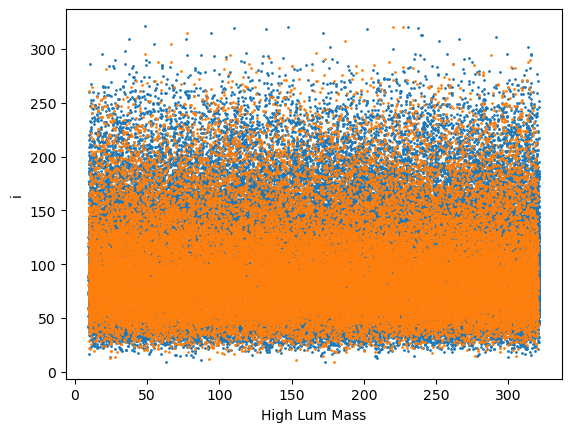

In [54]:
x1= np.linspace(np.min(qcd['mass']), np.max(qcd['mass']), np.size(qcd['mass']))
x2 = np.linspace(np.min(massh), np.max(massh), np.size(massh))
plt.scatter(x1,qcd['mass'], s =1) 
plt.scatter(x2,massh, s = 1)
plt.xlabel('High Lum Mass')
plt.ylabel('i')


In [13]:
#for mass
start = 100
end = 150
#shift = start-1
lst = list(range(start,end,1))

x = 0
for xx in lst:
    Lcut = massh[massh < xx]
    qcut = qcd['mass'][qcd['mass'] < xx]
    qsize = (np.size(qcut))/5
    Lsize = (np.size(Lcut))/(40344/20100)-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))




lst2 = list(range(start,end,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    Lcut2 = massh[massh > xx2]
    qcut2 = qcd['mass'][qcd['mass'] > xx2]
    qsize2 = (np.size(qcut2))/5
    Lsize2 = (np.size(Lcut2))/(40344/20100)-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))



Lcut3 = massh[(massh > v2[max_value2][0]) & (massh < v[max_value][0])]
qcut3 = qcd['mass'][(qcd['mass'] > v2[max_value2][0]) & (qcd['mass'] < v[max_value][0])]
qsize3 = np.size(qcut3)/5
Lsize3 = np.size(Lcut3)/(40344/20100)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (131, 0.8297296804072593)
(Cutting Left) location and significance is (124, 1.2021610476818385)
Significance between cuts 3.1339761522954706


#### Significance of evaluating mass in the range of largest expected spike produces a significance of 3.1 sigma, using this range of data for other probable features may yield a higher significance

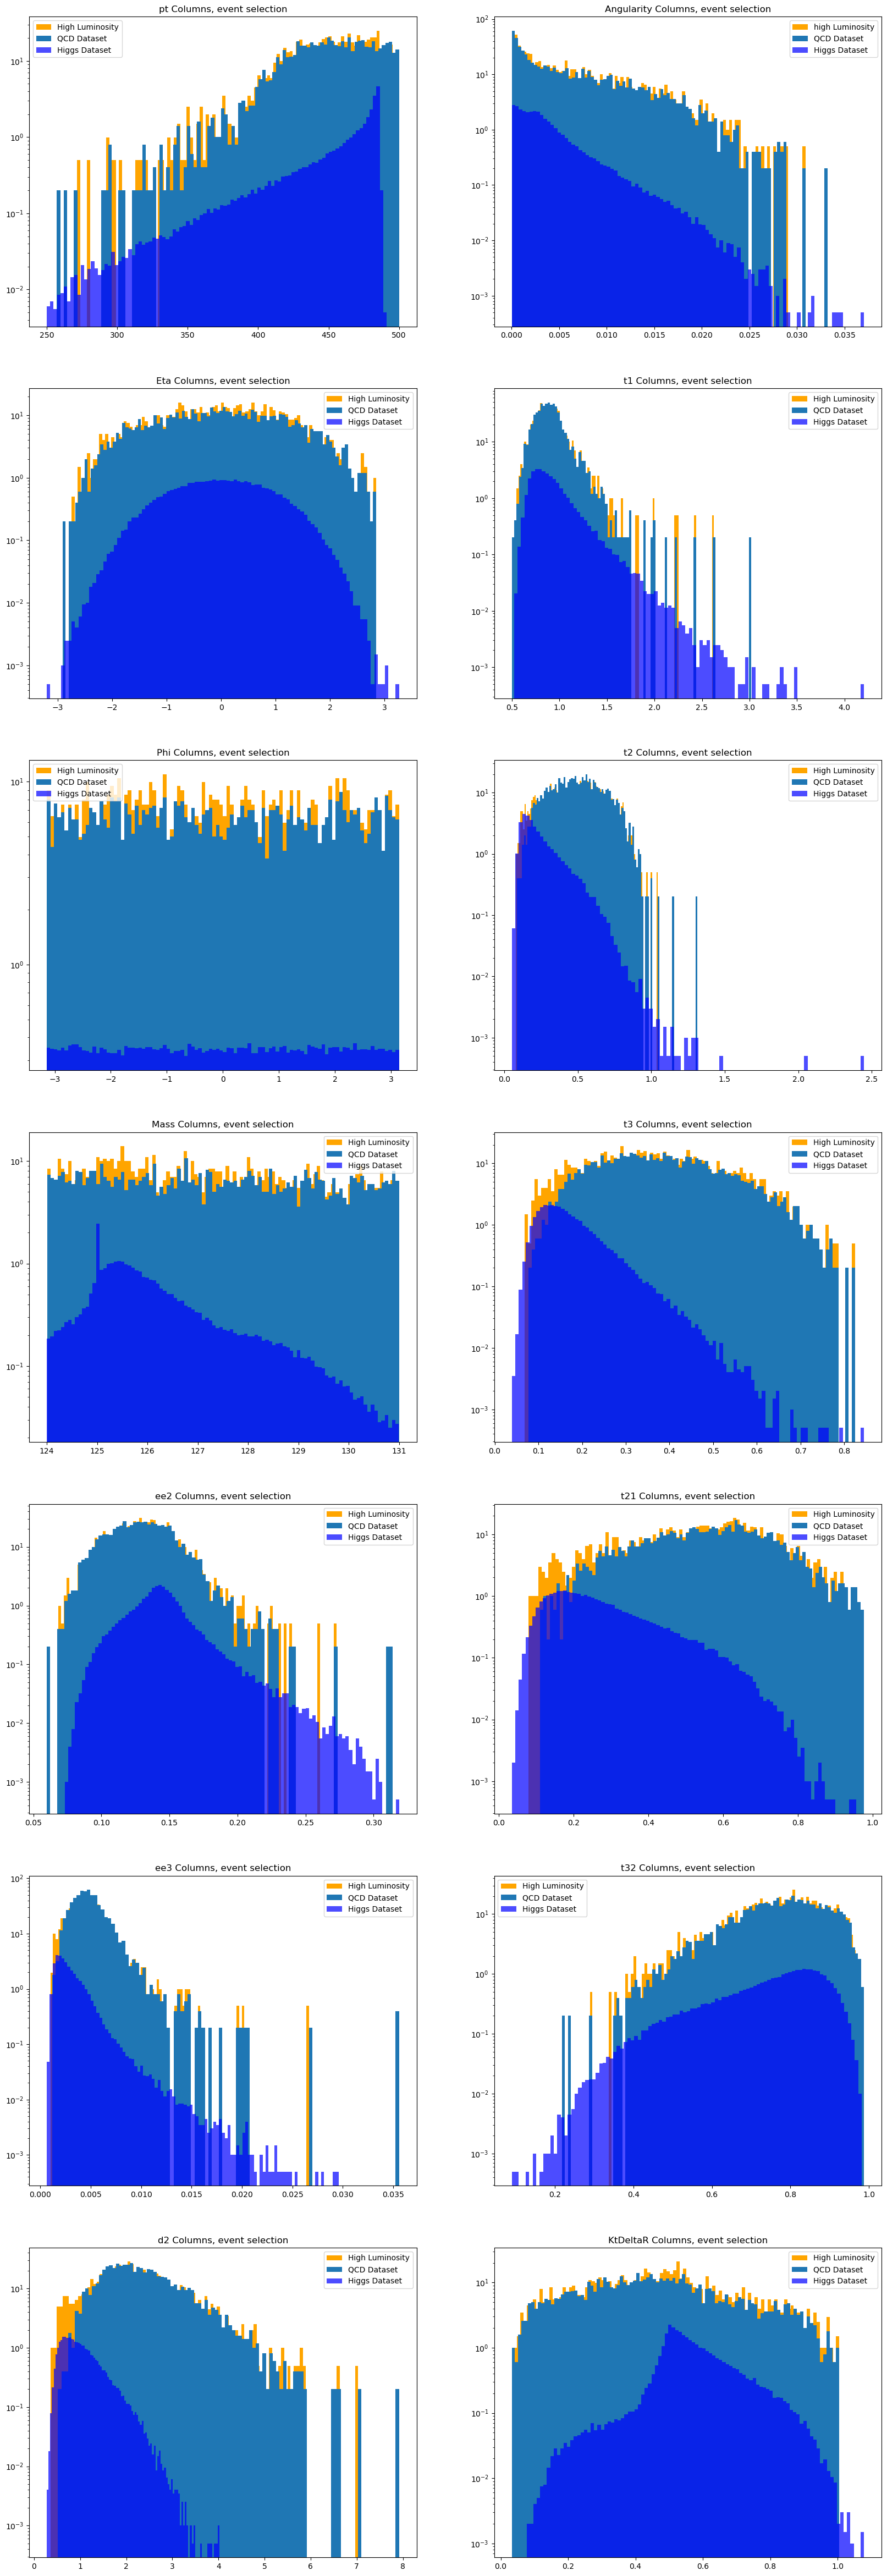

In [14]:
#plotting each feature given mass event selection
qcd_data_filter =(qcd['mass'] > 124) & (qcd['mass'] < 131)
hlum_data_filter = (massh > 124) & (massh < 131)
higgs_data_filter = (higgs['mass'] > 124) & (higgs['mass'] <131)


fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]
pthl_filt = pth[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(pthl_filt))
s1 = 20000/100000
s2 = 100/200000
s3 = 20100/40344
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[0,0].hist(pthl_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[0,0].hist(qpt_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(hpt_filt, 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns, event selection')

qeta_filt = qcd['eta'][qcd_data_filter]
heta_filt = higgs['eta'][higgs_data_filter]
etahl_filt = etah[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(etahl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[1,0].hist(etahl_filt, 100, weights = iii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[1,0].hist(qeta_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(heta_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns, event selection')

qphi_filt = qcd['phi'][qcd_data_filter]
hphi_filt = higgs['phi'][higgs_data_filter]
phihl_filt = phih[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(phihl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[2,0].hist(phihl_filt, 100, weights = iii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,0].hist(qphi_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(hphi_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns, event selection')

qmass_filt = qcd['mass'][qcd_data_filter]
hmass_filt = higgs['mass'][higgs_data_filter]
masshl_filt = massh[hlum_data_filter]
i = np.zeros(np.size(qmass_filt))
ii = np.zeros(np.size(hmass_filt))
iii = np.zeros(np.size(masshl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[3,0].hist(masshl_filt, 100, weights = iii,color =high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[3,0].hist(qmass_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(hmass_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns, event selection')

qee2_filt = qcd['ee2'][qcd_data_filter]
hee2_filt = higgs['ee2'][higgs_data_filter]
ee2hl_filt = ee2h[hlum_data_filter]
i = np.zeros(np.size(qee2_filt))
ii = np.zeros(np.size(hee2_filt))
iii = np.zeros(np.size(ee2hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[4,0].hist(ee2hl_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,0].hist(qee2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(hee2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns, event selection')

qee3_filt = qcd['ee3'][qcd_data_filter]
hee3_filt = higgs['ee3'][higgs_data_filter]
ee3hl_filt = ee3h[hlum_data_filter]
i = np.zeros(np.size(qee3_filt))
ii = np.zeros(np.size(hee3_filt))
iii = np.zeros(np.size(ee3hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[5,0].hist(ee3hl_filt, 100,weights = iii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[5,0].hist(qee3_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(hee3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns, event selection')

qd2_filt = qcd['d2'][qcd_data_filter]
hd2_filt = higgs['d2'][higgs_data_filter]
d2hl_filt = d2h[hlum_data_filter]
i = np.zeros(np.size(qd2_filt))
ii = np.zeros(np.size(hd2_filt))
iii = np.zeros(np.size(d2hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[6,0].hist(d2hl_filt, 100,weights = iii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density =False)
ax[6,0].hist(qd2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(hd2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns, event selection')

qang_filt = qcd['angularity'][qcd_data_filter]
hang_filt = higgs['angularity'][higgs_data_filter]
anghl_filt = angularityh[hlum_data_filter]
i = np.zeros(np.size(qang_filt))
ii = np.zeros(np.size(hang_filt))
iii = np.zeros(np.size(anghl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[0,1].hist(anghl_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'high Luminosity', density = False)
ax[0,1].hist(qang_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(hang_filt, 100, weights = ii, color = higgs_color, alpha =alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns, event selection')

qt1_filt = qcd['t1'][qcd_data_filter]
ht1_filt = higgs['t1'][higgs_data_filter]
t1hl_filt = t1h[hlum_data_filter]
i = np.zeros(np.size(qt1_filt))
ii = np.zeros(np.size(ht1_filt))
iii = np.zeros(np.size(t1hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[1,1].hist(t1hl_filt, 100,weights = iii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[1,1].hist(qt1_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(ht1_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns, event selection')

qt2_filt = qcd['t2'][qcd_data_filter]
ht2_filt = higgs['t2'][higgs_data_filter]
t2hl_filt = t2h[hlum_data_filter]
i = np.zeros(np.size(qt2_filt))
ii = np.zeros(np.size(ht2_filt))
iii = np.zeros(np.size(t2hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[2,1].hist(t2hl_filt, 100,weights = iii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,1].hist(qt2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(ht2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns, event selection')

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]
t3hl_filt = t3h[hlum_data_filter]
i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
iii = np.zeros(np.size(t3hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[3,1].hist(t3hl_filt, 100, weights = iii,color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[3,1].hist(qt3_filt, 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(ht3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns, event selection')

qt21_filt = qcd['t21'][qcd_data_filter]
ht21_filt = higgs['t21'][higgs_data_filter]
t21hl_filt = t21h[hlum_data_filter]
i = np.zeros(np.size(qt21_filt))
ii = np.zeros(np.size(ht21_filt))
iii = np.zeros(np.size(t21hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[4,1].hist(t21hl_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,1].hist(qt21_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(ht21_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns, event selection')

qt32_filt = qcd['t32'][qcd_data_filter]
ht32_filt = higgs['t32'][higgs_data_filter]
t32hl_filt = t32h[hlum_data_filter]
i = np.zeros(np.size(qt32_filt))
ii = np.zeros(np.size(ht32_filt))
iii = np.zeros(np.size(t32hl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[5,1].hist(t32hl_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[5,1].hist(qt32_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(ht32_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns, event selection')

qKtDeltaR_filt = qcd['KtDeltaR'][qcd_data_filter]
hKtDeltaR_filt = higgs['KtDeltaR'][higgs_data_filter]
KtDeltaRhl_filt = KtDeltaRh[hlum_data_filter]
i = np.zeros(np.size(qKtDeltaR_filt))
ii = np.zeros(np.size(hKtDeltaR_filt))
iii = np.zeros(np.size(KtDeltaRhl_filt))
i[:] = s1
ii[:] = s2
iii[:] = s3
ax[6,1].hist(KtDeltaRhl_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[6,1].hist(qKtDeltaR_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(hKtDeltaR_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns, event selection')
plt.show()

In [15]:
#Looking at these histograms, d2, ee3, t21, t3 look like candidate features for signals.

In [16]:
#Using d2
start = np.min(qd2_filt)+0.001
end = 2
lst = list(np.linspace(start,end,100))

x = 0
for xx in lst:
    Lcut = d2hl_filt[d2hl_filt < xx]
    qcut = qd2_filt[qd2_filt < xx]
    qsize = (np.size(qcut))/5
    Lsize = (np.size(Lcut))/(40344/20100)-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))


lst2 = list(np.linspace(start,end,100))
x2 = 0
for xx2 in lst2:
    Lcut = d2hl_filt[d2hl_filt > xx]
    qcut = qd2_filt[qd2_filt > xx]
    qsize = (np.size(qcut))/5
    Lsize = (np.size(Lcut))/(40344/20100)-qsize
    sig = (Lsize)/(qsize**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))


Lcut3 = d2hl_filt[(d2hl_filt > v2[max_value2][0]) & (d2hl_filt < v[max_value][0])]
qcut3 = qd2_filt[(qd2_filt > v2[max_value2][0]) & (qd2_filt < v[max_value][0])]
qsize3 = (np.size(qcut3))/5
Lsize3 = (np.size(Lcut3))/(40344/20100)-qsize3
sig3 = (Lsize3)/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (0.6525941347324955, 32.974087971830336)
(Cutting Left) location and significance is (0.5328247244864951, 0.05893206302768277)
Significance between cuts 25.1757842727866


#### Significance of signal, while first evaluating mass, then d2 produces a sigma value of over 25! This is extremely high but can be attributed to the large and obvious discrepency spanning many orders of magnitude between the measured signal and the expected signal in the d2 data once the optimal mass cut was made.

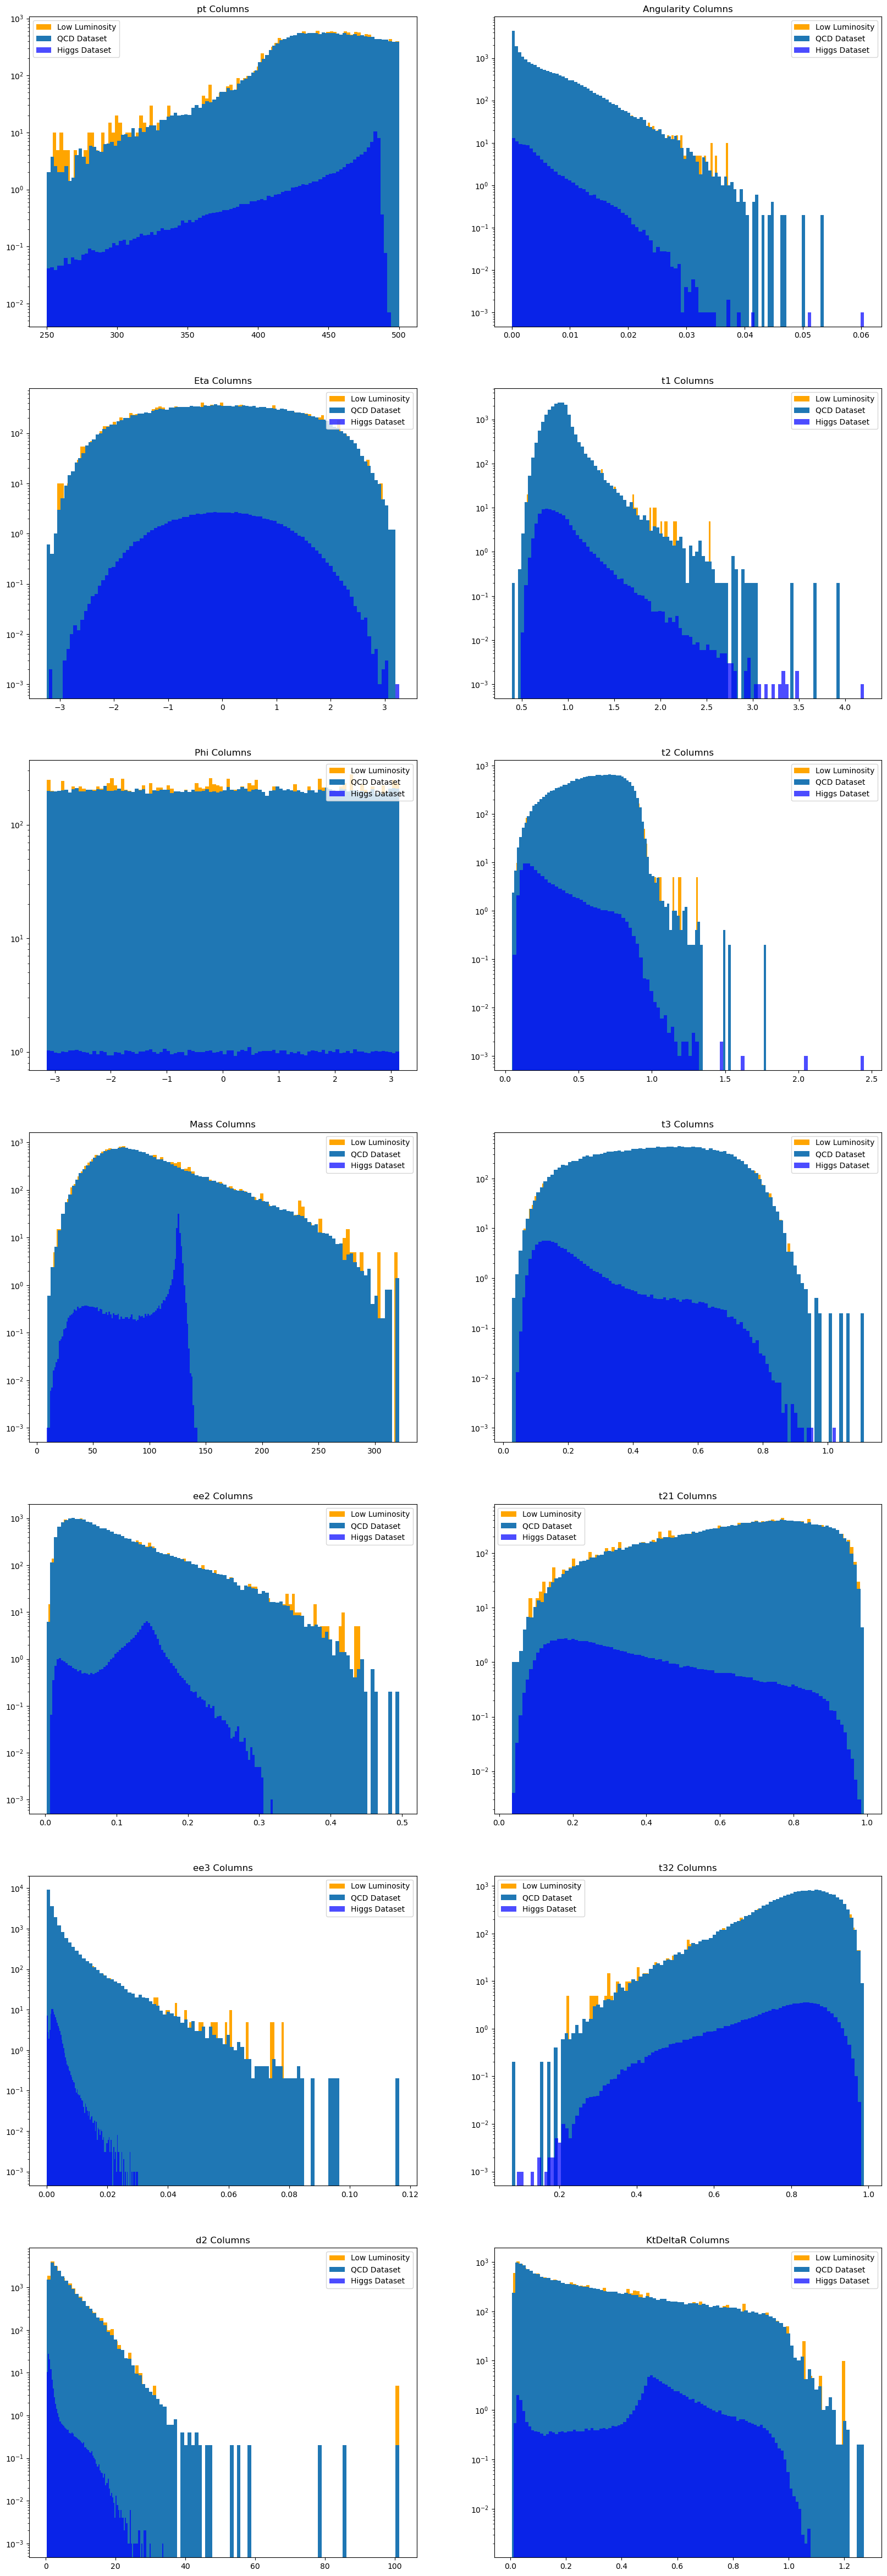

In [18]:
fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

s1 = 20000/100000
s2 = 100/100000
s3 = 20100/ (np.size(massl))
s4 = 20100/ (np.size(massh))
i = np.zeros(100000)
ii = np.zeros(100000)
iii = np.zeros(np.size(massl))
iiii = np.zeros(np.size(massh))
i[:] = s1
ii[:] = s2
iii[:] = s3
iiii[:] = s4

low_color = 'orange'
high_color = 'orange'
higgs_color = 'blue'

alpha_l = 1
alpha_h = 1
alpha_qcd = 1
alpha_higgs = 0.7

ax[0,0].hist(ptl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[0,0].hist(qcd['pt'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(higgs['pt'], 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns')

ax[1,0].hist(etal, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[1,0].hist(qcd['eta'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(higgs['eta'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns')

ax[2,0].hist(phil, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[2,0].hist(qcd['phi'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(higgs['phi'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns')

ax[3,0].hist(massl, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[3,0].hist(qcd['mass'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(higgs['mass'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns')

ax[4,0].hist(ee2l, 100,weights = iii, color = low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[4,0].hist(qcd['ee2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(higgs['ee2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist(ee3l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[5,0].hist(qcd['ee3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(higgs['ee3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist(d2l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density =False)
ax[6,0].hist(qcd['d2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(higgs['d2'], 100, weights = ii, color =higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns')

ax[0,1].hist(angularityl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[0,1].hist(qcd['angularity'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(higgs['angularity'], 100, weights = ii, color =higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns')

ax[1,1].hist(t1l, 100,weights = iii, color =low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[1,1].hist(qcd['t1'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(higgs['t1'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns')

ax[2,1].hist(t2l, 100,weights = iii, color = low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[2,1].hist(qcd['t2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(higgs['t2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns')

ax[3,1].hist(t3l, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[3,1].hist(qcd['t3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(higgs['t3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns')

ax[4,1].hist(t21l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[4,1].hist(qcd['t21'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(higgs['t21'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns')

ax[5,1].hist(t32l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[5,1].hist(qcd['t32'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(higgs['t32'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns')

ax[6,1].hist(KtDeltaRl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[6,1].hist(qcd['KtDeltaR'], 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(higgs['KtDeltaR'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns')
plt.show()

In [19]:
## Im looking for graphs in which features present in the dark blue (expected signals) correlate with features present in the orange (measured data) when compared against the light blue (expected background)

#t21, KtDeltaR, mass have candidates in the Low Luminosity data

In [27]:
#for mass
start = 100
end = 150
lst = list(range(start,end,1))

x = 0
for xx in lst:
    Lcut = massl[massl < xx]
    qcut = qcd['mass'][qcd['mass'] < xx]
    qsize = (np.size(qcut))/5
    Lsize = (np.size(Lcut))/(4060/20100)-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))




lst2 = list(range(start,end,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    Lcut2 = massl[massl > xx2]
    qcut2 = qcd['mass'][qcd['mass'] > xx2]
    qsize2 = (np.size(qcut2))/5
    Lsize2 = (np.size(Lcut2))/(4060/20100)-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))



Lcut3 = massl[(massl > v2[max_value2][0]) & (massl < v[max_value][0])]
qcut3 = qcd['mass'][(qcd['mass'] > v2[max_value2][0]) & (qcd['mass'] < v[max_value][0])]
qsize3 = np.size(qcut3)/5
Lsize3 = np.size(Lcut3)/(4060/20100)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (141, 2.393946923457531)
(Cutting Left) location and significance is (111, 2.362510082360958)
Significance between cuts 6.236408939435975


In [30]:
np.size(massh)

40344

In [25]:
np.size(massl)

4060